<a href="https://colab.research.google.com/github/williamokomba/DSC6-week-7-IP/blob/main/DSC_week_7_IP_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Moringa Data science core week 7 Independent project: William**

##*1.0* Defining the Question


**Dataset provided**


hass hosing prices dataset [link](http://bit.ly/IndependentProjectWeek7Dataset)


###1.1 Specifying the data analytic question

The main objective of this project is to determine factors affecting prices of houses and developing a model to effectively predict the sale prices.


###1.2 Defining the metric for success

* Determining MAIN factors affecting price of houses.
* Developing a model that can predict the prices of houses.

### 1.3 Understanding the Contex

we have to analyse data to see what are those factors buyer wants, this will determine on whether the prices will be low or how.

### 1.4 Recording the Experimental Design

* Reading the Data

* Tidying the Dataset

* Exploratory Analysis

* Carrying out various regression models
* Follow-up questions

### 1.5 Assessing the Relevance of the Data

Below is the dataset glossary:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15



## 2.Loading and reading Our Datasets

In [74]:
# Importing standard libraries
#
# load pandas
import pandas as pd               # library for data manipulation and analysis
#
# load numpy
import numpy as np                # library for performin scientific computations
#
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
#
# load Seaborn
import seaborn as sns             # library for creating rich data visualisations


In [75]:
#uploading and reading the dataset
#
house= pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

## 3. Checking the Data

In [76]:
# preview the first 5 records
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
# Previewing the bottom of our fifa result dataset
#
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


**observation** house dataset has uniform values from top to the bottom.

In [78]:
# checking the shape of the data
house.shape

(21613, 20)

**observation** the dataset has 21613 records and 20 variables.

In [79]:
# Checking whether each column of result dataset has an appropriate datatype
#
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**observation** the datset comprises of integer and float datatype.the dataype corresponds to the variables appropriately

this also gives us a hind that there is no null values since all variables has 21613 records.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important

### a. Validation

In [80]:
#validity for house dataset
#
house.price.unique

<bound method Series.unique of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

the price variable  conforms to the prices

## 5. Tidying the Dataset 

In [81]:
#dataset preview
#
house.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15281,7137970130,339999.0,3,2.5,2360,8093,2.0,0,0,3,8,2360,0,1995,0,98092,47.3257,-122.170,1860,6762
7814,985001321,291000.0,4,1.0,1590,24330,1.5,0,0,3,6,1140,450,1942,0,98168,47.4906,-122.309,1000,16228
9677,2425059144,607500.0,4,2.5,2110,13939,1.0,0,0,3,8,1270,840,1978,0,98008,47.6431,-122.113,2140,8882
15681,1726059134,1080000.0,3,2.5,2830,56628,2.0,0,0,3,11,2830,0,2001,0,98011,47.7409,-122.198,2830,16430
842,9429500045,428750.0,3,1.0,1620,30736,1.5,0,0,4,7,1620,0,1911,1977,98006,47.5719,-122.119,2440,28826


In [82]:
#Dropping unnecesary columns
#
house1=house
#
house1.drop(['id'], axis=1, inplace=True)
house.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


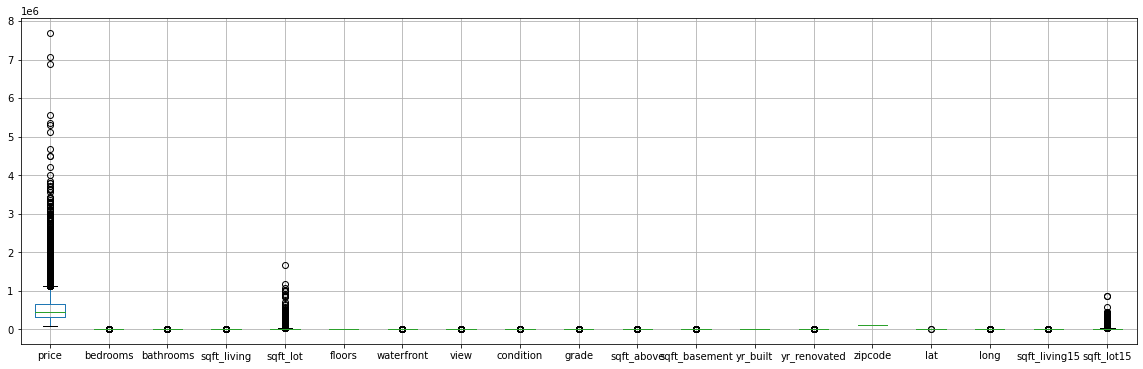

In [83]:
#checking for outliers
#
#creating a copy of the dataset just for maniplation 
#
# Checking for Outliers
#
house1= house
plt.figure(figsize = (20, 6))
house1.boxplot()
plt.show()

**observation** there are ouliers in the price,sqft_lot and sqft_lot 15 variables.

In [84]:
#indentifying and dropping ouliers using Z-test function
#
#import scipy from start
#
from scipy import stats
#
z = np.abs(stats.zscore(house1))
print(z)

[[0.86641874 0.39873715 1.44746357 ... 0.30607896 0.9433552  0.26071541]
 [0.00594021 0.39873715 0.1756067  ... 0.74634143 0.43268619 0.18786773]
 [0.98047774 1.47395936 1.44746357 ... 0.13565477 1.07013975 0.17237524]
 ...
 [0.37588065 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.39414129]
 [0.38159993 0.39873715 0.50022075 ... 1.02891048 0.8412214  0.42051149]
 [0.58576282 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.41794772]]


In [85]:
threshold = 3
print(np.where(z > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600]), array([13,  2,  3, ..., 11, 17, 10]))


In [86]:
#comfirming outlier with z>3
#The first array contains the list of row numbers and second array respective column numbers, 
#which mean z[1][13] have a Z-score higher than 3.
#
#confirming
#
print(z[1][13])

4.746677600764257


**observation**: setting threshold at 3, then the there is 1 row and 13 colunms having outliers(Z>3).

In [87]:
# Dropping outliers identified
#
house2 =house1
house2= house1[(z < 3).all(axis=1)]


In [88]:
#checking the shape of the dataset after dropping outliers
#
house2.shape

(18702, 19)

**observation** after dropping outliers, new dataset has 18702 records and 19 variables.

In [89]:
#checking for the missing varibales
#
house2.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**observation**: there's no missing data

In [90]:

# checking for duplicates
#
house2.duplicated().value_counts()

False    18698
True         4
dtype: int64

**observation**: there are 4 duplicates. we will drop them.

In [91]:
# dropping the duplicated values 
#
house2.drop_duplicates(inplace=True)
#
#confirming the duplicates are dropped.
#
house2.duplicated().any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [92]:
#5.1i standardizing variable names for readability
#
house2.columns = house2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
house2.columns
#



Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Observation**: this ensure the variables have standard format. this helps in data analysis

## Exploratory Data Analysis

### Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

In [93]:
#dataset preview
#
house2.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12052,700000.0,3,1.75,2010,4905,1.0,0,0,5,7,1230,780,1912,0,98122,47.6105,-122.309,2210,1834
1839,249000.0,3,1.50,1580,7200,1.0,0,0,4,7,1080,500,1976,0,98092,47.2761,-122.152,1580,7470
18351,273148.0,3,1.75,1710,7210,1.0,0,0,4,7,1240,470,1974,0,98031,47.4094,-122.175,1840,7245
18378,1050000.0,3,2.50,2200,1970,2.0,0,0,3,9,1610,590,2008,0,98102,47.6426,-122.327,1890,3505
5732,499000.0,3,2.50,1610,1728,3.0,0,0,3,8,1610,0,2000,0,98115,47.6776,-122.318,1540,3090


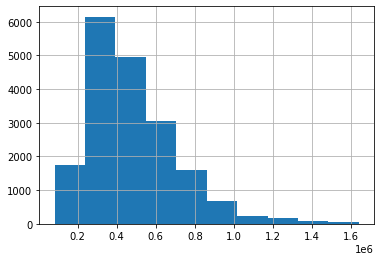

In [94]:
# univariate analysis: checking the price distribution on histogram 
#
house2.price.hist()
plt.show()

observation: it is not normally distributed, skewed to the right. meaning the mean is greater than the mode. this is expected because some house fetch higher prices.

In [95]:
#checking mean and mode
#
mean=house2["price"].mean()
mode= house2["price"].mode()
print("mean: ",mean )
print("mode: ", mode)

mean:  480958.6024708525
mode:  0    350000.0
dtype: float64


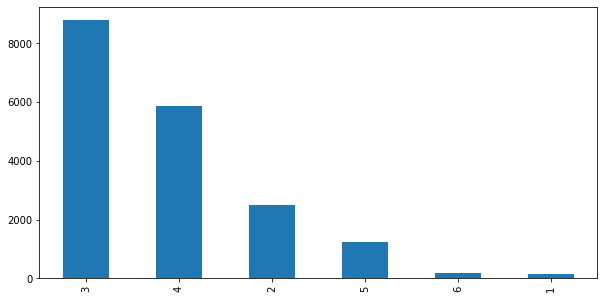

In [96]:
# univariate analysis: bedrooms variable plot bar
#
plt.figure(figsize = (10, 5))
house2['bedrooms'].value_counts().plot.bar()

**observation**: 3 bedroom houses has more records.

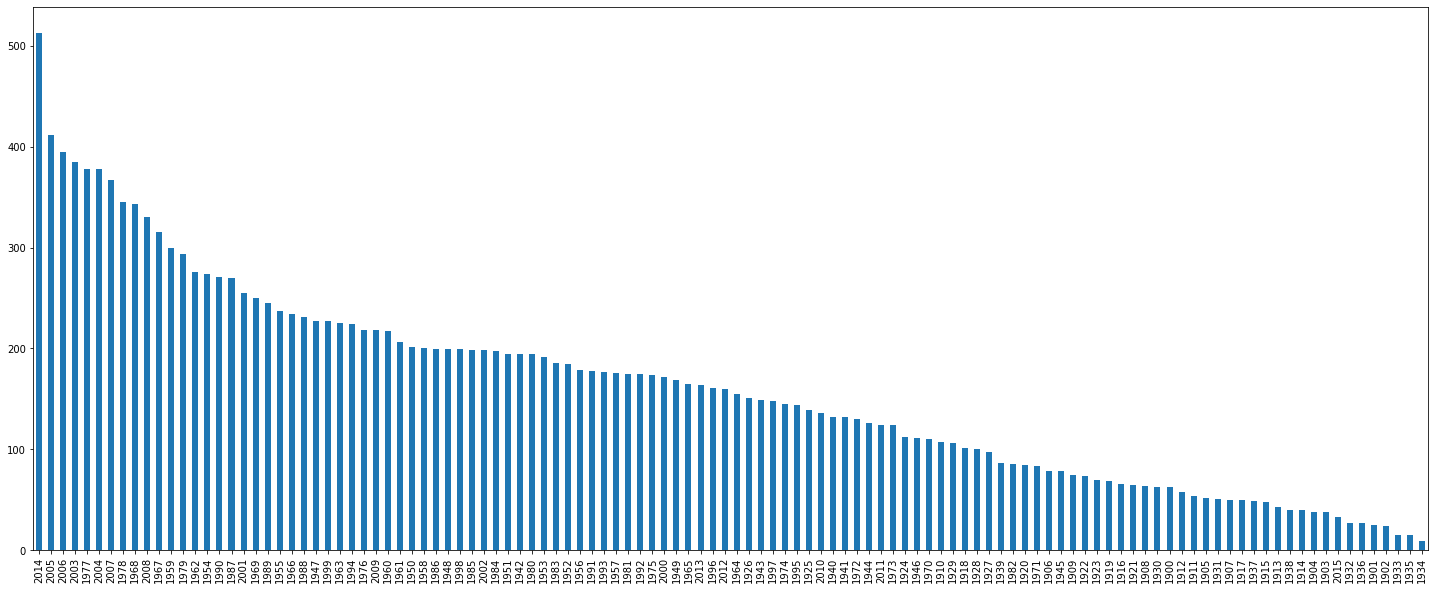

In [97]:
# univariate analysis: year_built variable plot bar
#
plt.figure(figsize=(25,10))
house2['yr_built'].value_counts().plot.bar()

**observation**: 2014 has more records(more houses were build in 2014

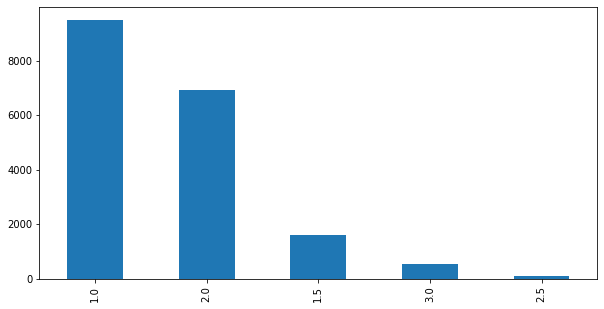

In [98]:
#univariate analysis: floor variable plot bar
#
plt.figure(figsize=(10,5))
house2['floors'].value_counts().plot.bar()

one floor houses has more records. meaning many 1 floors houses were built.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


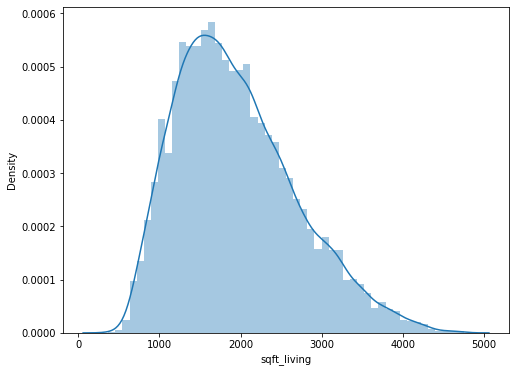

In [99]:
# univariate analysis: home-team_score variable distplot
#
plt.figure(figsize = (8, 6))
sns.distplot(house2.sqft_living);

**Observation**:From the above histograms, it can be observed that the variable is slightly skewed to the right

### Bivariate analysis

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

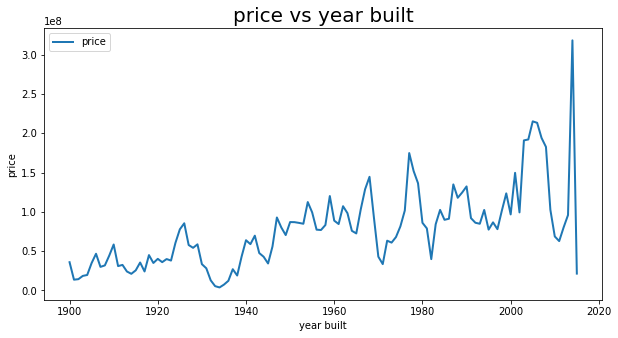

In [100]:
#bivariate analysis: prices vs year built 
#
price_distribution=house2.groupby([house2.yr_built]).sum()
price_distribution.price.plot(figsize=(10,5), linewidth=2)
plt.title('price vs year built', fontsize=20)
plt.xlabel('year built', fontsize=10);
plt.ylabel('price', fontsize=10)
plt.legend()

**observation** there is no much different in prices but houses built after 1960 seems to have slighly high prices.



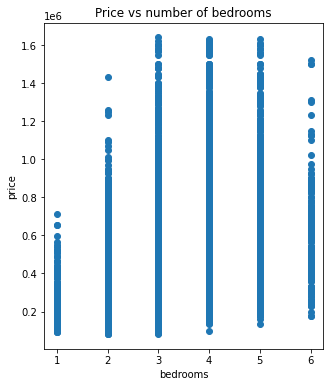

In [101]:
fig, ax = plt.subplots(figsize=(5,6))
plt.scatter(house2['bedrooms'],house2['price'])
plt.title('Price vs number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

**observation**: this shows how the number of bedrooms ffects the house prices

In [102]:
# summary of the dataset
#
house2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.869800e+04,18698.000000,18698.000000,18698.000000,18698.000000,18698.000000,18698.0,18698.000000,18698.000000,18698.000000,18698.000000,18698.000000,18698.000000,18698.0,18698.000000,18698.000000,18698.000000,18698.000000,18698.000000
mean,4.809586e+05,3.323190,2.038132,1949.134881,9799.951064,1.481415,0.0,0.091293,3.422666,7.536047,1694.037223,255.097658,1971.814793,0.0,98078.404321,47.560448,-122.220728,1910.308643,9050.874960
std,2.314409e+05,0.848154,0.687677,737.989189,11369.647770,0.540161,0.0,0.400110,0.647906,1.025070,707.885436,387.290674,28.969365,0.0,53.309126,0.140217,0.128616,598.721812,8930.918582
min,8.200000e+04,1.000000,0.000000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,0.0,98001.000000,47.176400,-122.502000,460.000000,651.000000
25%,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,1953.000000,0.0,98033.000000,47.467600,-122.329000,1470.000000,5000.000000
50%,4.310000e+05,3.000000,2.000000,1840.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,1500.000000,0.000000,1976.000000,0.0,98065.000000,47.571800,-122.235000,1791.000000,7439.500000
75%,5.990000e+05,4.000000,2.500000,2410.000000,9884.250000,2.000000,0.0,0.000000,4.000000,8.000000,2094.500000,500.000000,1997.000000,0.0,98118.000000,47.681100,-122.134000,2260.000000,9600.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1610.000000,2015.000000,0.0,98199.000000,47.777600,-121.797000,4040.000000,93825.000000


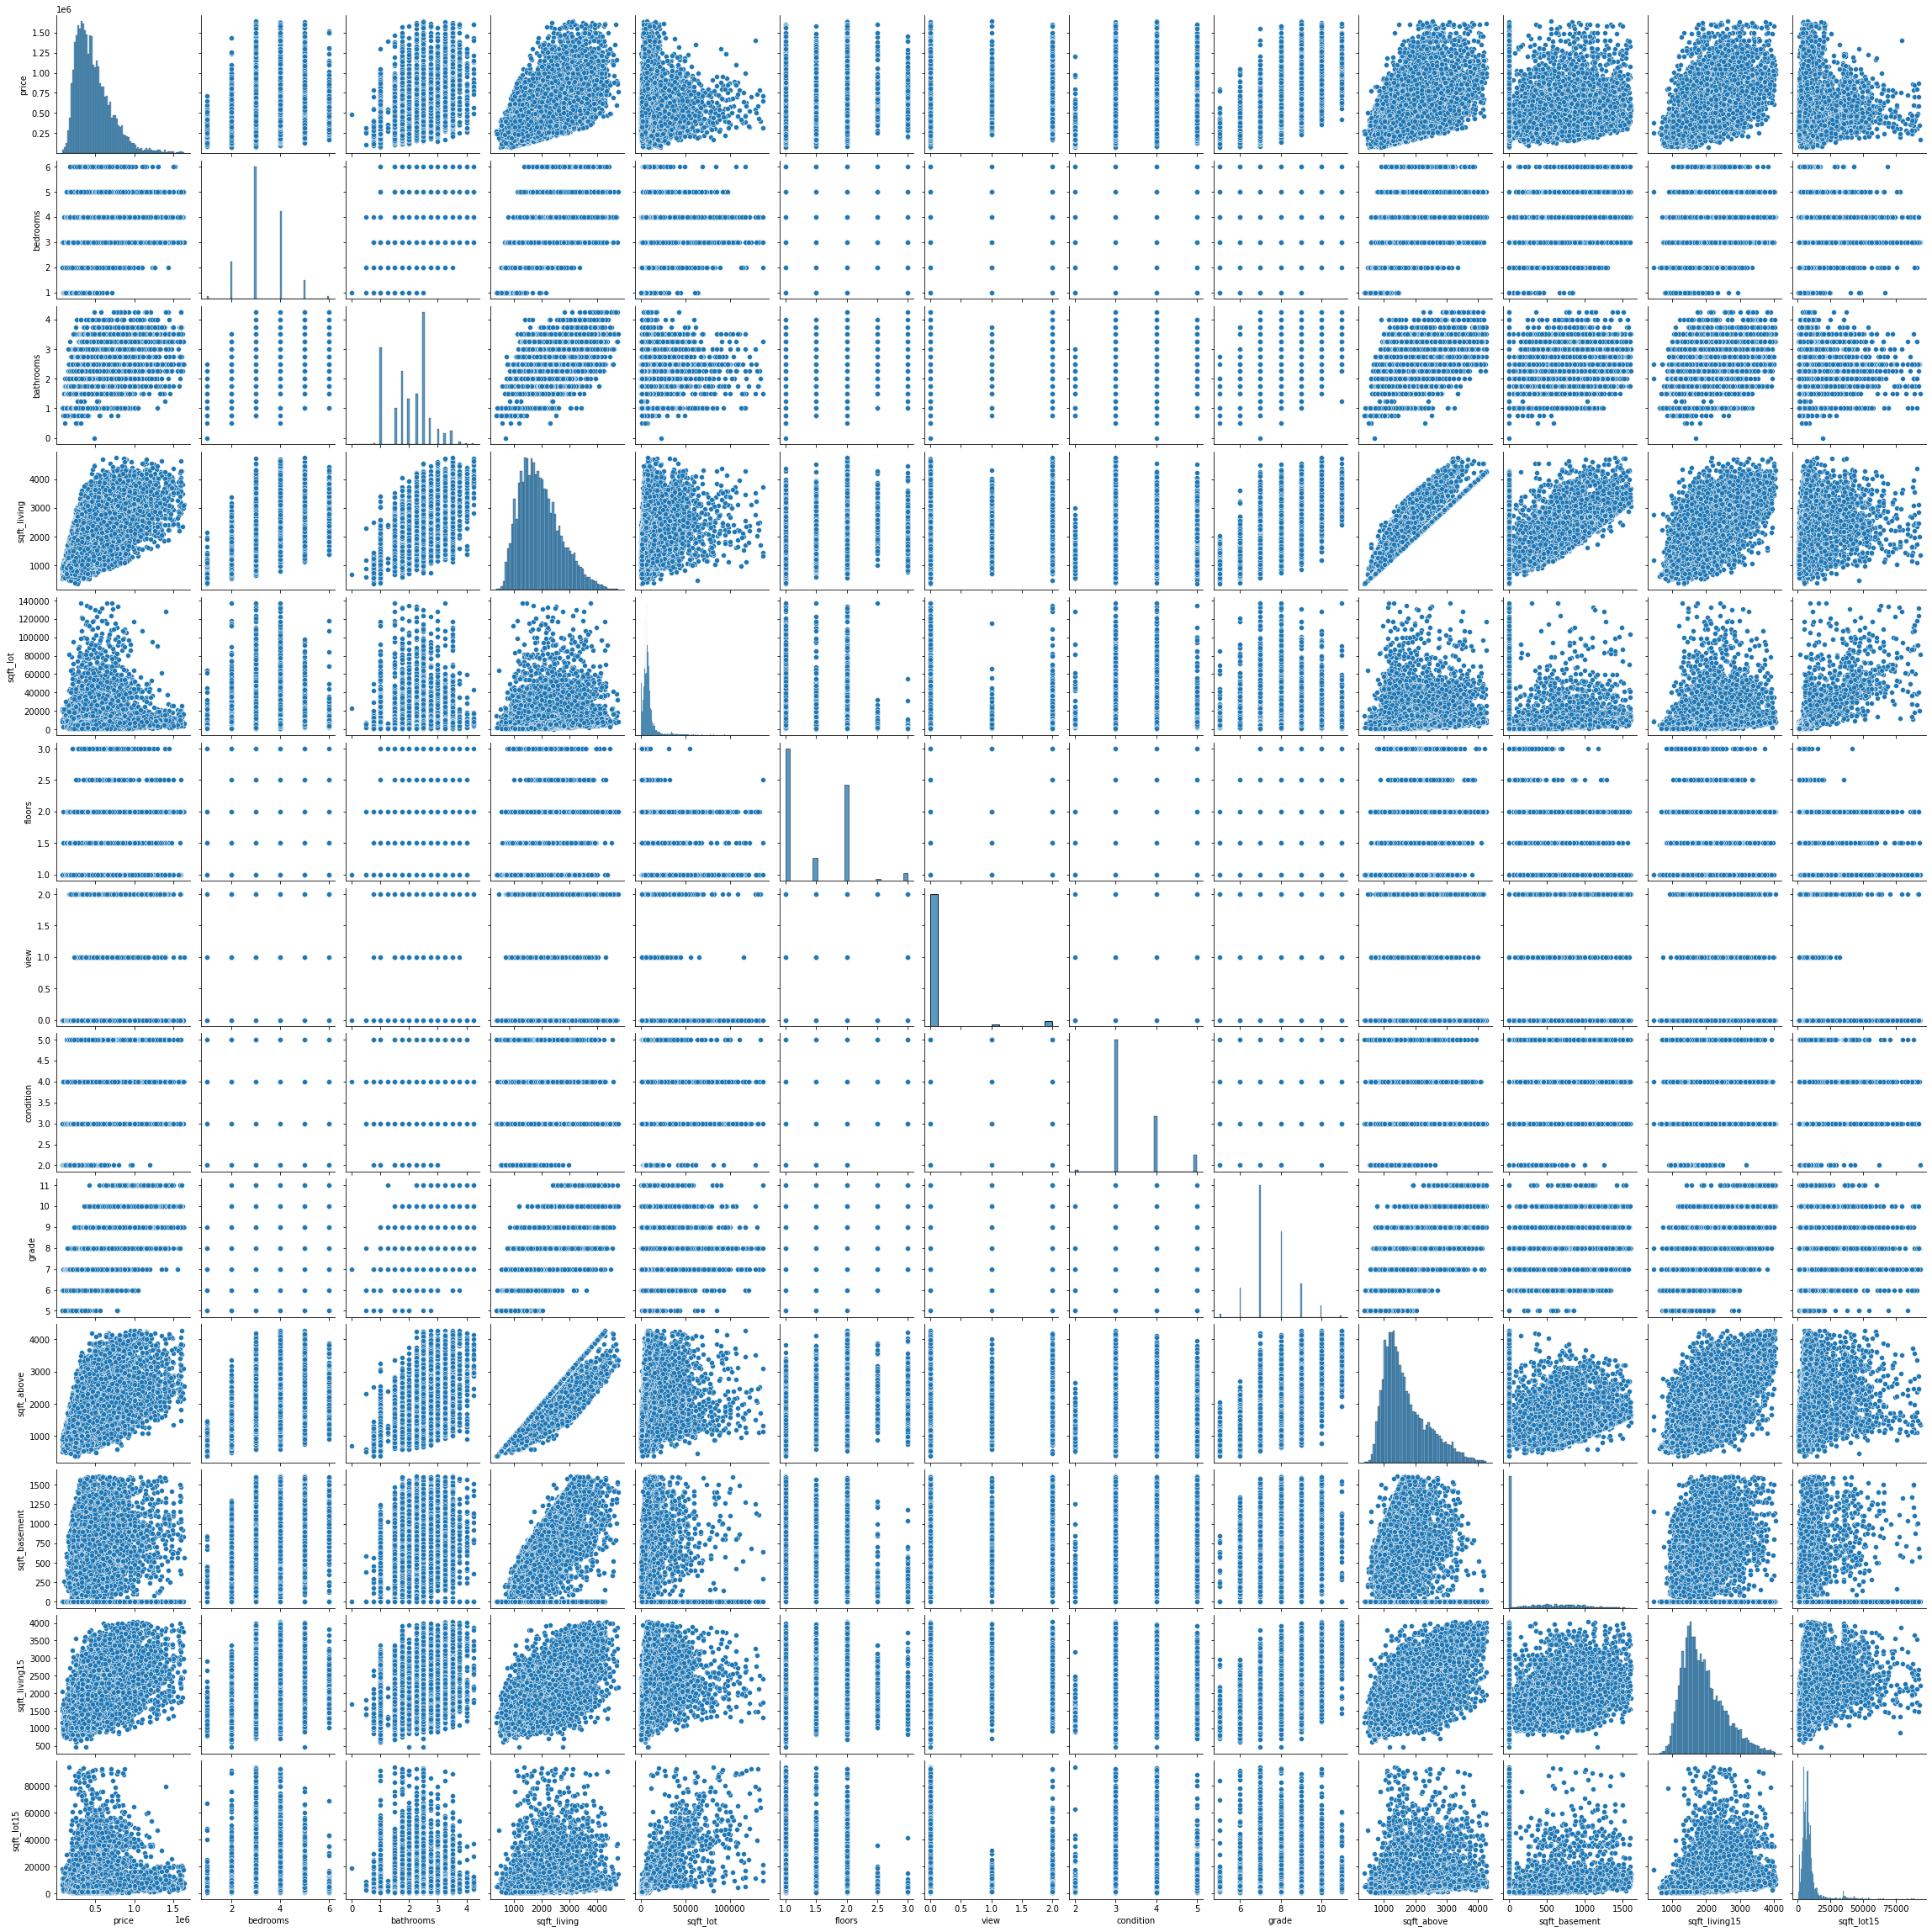

In [103]:
# bivariate analysis: scatter plots on numeric variables to visualize any correlation
#
numerical = house2[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']]
sns.pairplot(numerical)
plt.show()

**obsrevation** all variables have a linear relationship even though some are not continous.

In [104]:
# Create a correlation matrix
#
## Vizualise the correlation matrix using a heat map
corr = numerical.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.302761,0.442805,0.622053,0.100824,0.276257,0.182544,0.049942,0.634737,0.533125,0.210893,0.550715,0.092845
bedrooms,0.302761,1.000000,0.488973,0.608949,0.112656,0.160733,0.038663,0.023148,0.334513,0.485789,0.272443,0.406991,0.114331
bathrooms,0.442805,0.488973,1.000000,0.711406,0.063398,0.519448,0.066413,-0.145594,0.619093,0.632711,0.199135,0.537800,0.066986
sqft_living,0.622053,0.608949,0.711406,1.000000,0.230959,0.357098,0.122587,-0.074855,0.711608,0.857308,0.338540,0.750132,0.234673
sqft_lot,0.100824,0.112656,0.063398,0.230959,1.000000,-0.101599,0.031256,0.045733,0.142761,0.212933,0.050900,0.269905,0.817112
floors,0.276257,0.160733,0.519448,0.357098,-0.101599,1.000000,-0.016525,-0.288781,0.473532,0.538351,-0.303536,0.280244,-0.104783
view,0.182544,0.038663,0.066413,0.122587,0.031256,-0.016525,1.000000,0.033735,0.106667,0.041729,0.157320,0.142521,0.018057
condition,0.049942,0.023148,-0.145594,-0.074855,0.045733,-0.288781,0.033735,1.000000,-0.182674,-0.184595,0.194763,-0.119253,0.053749
grade,0.634737,0.334513,0.619093,0.711608,0.142761,0.473532,0.106667,-0.182674,1.000000,0.716358,0.046631,0.676380,0.157860
sqft_above,0.533125,0.485789,0.632711,0.857308,0.212933,0.538351,0.041729,-0.184595,0.716358,1.000000,-0.194173,0.731694,0.222052


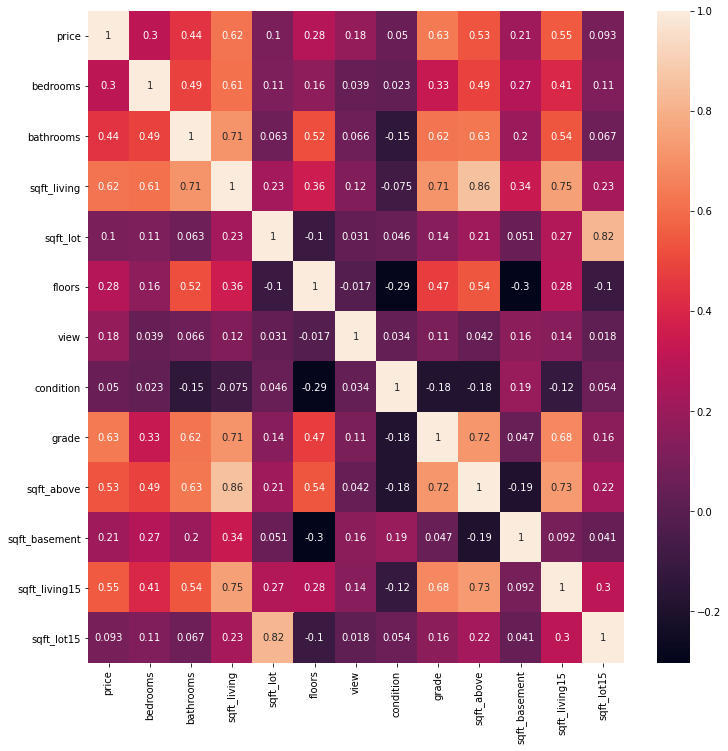

In [105]:
# Vizualise the correlation matrix using a heat map
#
plt.figure(figsize=(12, 12))
sns.heatmap(numerical.corr(),  annot=True)
plt.show()

**observation**: from the correlation matrics the factors are correlated to the price are bathrooms, sqft_living, grade, sqft_above and sqft_living15

##Multivariate Analysis

Linear Discriminant Analysis (LDA)

In [106]:
#dropping sqft_living15,sqft_lot15, # i will use sqft_living and 'sqft_lot instead
house3=numerical[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement']]
house3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0


In [107]:
#Divide it into our Feature (Independent/Predictor) and Target(Dependent/Response) variables In this case the Target variable
#We split the data into a training set and a test set.
#
x = house3.drop(columns = ['price'])
y = house3['price']
#
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...  grade  sqft_above  sqft_basement
0             3       1.00         1180  ...      7        1180              0
2             2       1.00          770  ...      6         770              0
3             4       3.00         1960  ...      7        1050            910
4             3       2.00         1680  ...      8        1680              0
6             3       2.25         1715  ...      7        1715              0
...         ...        ...          ...  ...    ...         ...            ...
21608         3       2.50         1530  ...      8        1530              0
21609         4       2.50         2310  ...      8        2310              0
21610         2       0.75         1020  ...      7        1020              0
21611         3       2.50         1600  ...      8        1600              0
21612         2       0.75         1020  ...      7        1020              0

[18698 rows x 10 columns]
0        221900.0
2      

In [108]:
#Then statndardize the data using StandardScaler, Fitting on the Training set and transforming both on the Training and Test Set.
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import metrics

In [109]:
# Subject our features/indepedent to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()
#
lda= lda.fit(house3, y)
lda_house3 = lda.transform(house3)

In [110]:
# Display the coeficients of the reducted columns
lda.coef_

array([[ 0.00000000e+00,  1.23623928e+00, -8.70108338e-01, ...,
        -1.91798351e+00, -7.59415509e-04, -2.07607531e-03],
       [ 0.00000000e+00, -6.29104868e-01,  1.14627523e+00, ...,
        -4.89045864e+00, -9.73485266e-04, -1.30362451e-03],
       [ 0.00000000e+00, -1.59456512e+00,  3.10565492e-01, ...,
        -5.10685013e+00,  1.10519758e-03, -1.48109407e-03],
       ...,
       [ 0.00000000e+00, -1.32524828e+00,  3.16351758e-02, ...,
         1.96685253e+00,  1.72661859e-03,  1.17774454e-03],
       [ 0.00000000e+00,  9.37940738e-01, -6.50656953e-01, ...,
         1.93519000e+00,  4.32581541e-04,  1.43582686e-03],
       [ 0.00000000e+00, -2.52345141e+00, -2.20243742e+00, ...,
         1.83354391e+00,  1.94485521e-03,  3.54953248e-03]])

In [111]:
# displaying coeffient in dataframe.
#
coeff = pd.DataFrame(index=house3.columns.values, data=lda.coef_[0].T)
coeff.sort_values(0, ascending=False)

,0
bedrooms,1.236239
sqft_lot,0.000039
price,0.000000
sqft_above,-0.000759
sqft_living,-0.001726
sqft_basement,-0.002076
view,-0.442994
bathrooms,-0.870108
floors,-0.886112
grade,-1.917984


**Observation**: we can use linear combination of bedrooms and sqft_lot to predict the price of a house

## Creating models

### Multi-linear regression 

Assumptions of linear regression

Data has no outliers

Data has no multi-colinearity

The dependent variable has a linear relationship with the independent variables

Independent variables should be continous

There is no heteroskedasticity present

In [125]:
# we will use the same dataset used on multivariate
house3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0


In [126]:
#1. checking for multicollinearity
# Let's display the correlations between the variables
# Detecting Multicollinearity on the predictor variables & Checking for multicollinearity on the independent variables only
#
indep= house3.drop(columns = ['price'])

In [127]:
corr=indep.corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
bedrooms,1.000000,0.488973,0.608949,0.112656,0.160733,0.038663,0.023148,0.334513,0.485789,0.272443
bathrooms,0.488973,1.000000,0.711406,0.063398,0.519448,0.066413,-0.145594,0.619093,0.632711,0.199135
sqft_living,0.608949,0.711406,1.000000,0.230959,0.357098,0.122587,-0.074855,0.711608,0.857308,0.338540
sqft_lot,0.112656,0.063398,0.230959,1.000000,-0.101599,0.031256,0.045733,0.142761,0.212933,0.050900
floors,0.160733,0.519448,0.357098,-0.101599,1.000000,-0.016525,-0.288781,0.473532,0.538351,-0.303536
view,0.038663,0.066413,0.122587,0.031256,-0.016525,1.000000,0.033735,0.106667,0.041729,0.157320
condition,0.023148,-0.145594,-0.074855,0.045733,-0.288781,0.033735,1.000000,-0.182674,-0.184595,0.194763
grade,0.334513,0.619093,0.711608,0.142761,0.473532,0.106667,-0.182674,1.000000,0.716358,0.046631
sqft_above,0.485789,0.632711,0.857308,0.212933,0.538351,0.041729,-0.184595,0.716358,1.000000,-0.194173
sqft_basement,0.272443,0.199135,0.338540,0.050900,-0.303536,0.157320,0.194763,0.046631,-0.194173,1.000000


**observation** :it shows the relationship between variables. The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself.

the above will be used to compute the VIF (Variance Inflation Factor) score for each variable, by finding the inverse matrix of the correlations matrix.

In [128]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
bedrooms,1.697764,-0.335666,-9.001151e-01,0.050408,0.118231,0.058333,-0.078883,0.344428,-1.984211e-01,-1.074273e-01
bathrooms,-0.335666,2.614688,-2.333260e+00,0.077983,-0.856026,0.039314,0.062192,-0.412194,1.324491e+00,3.555077e-01
sqft_living,-0.897898,-2.336353,-2.604552e+13,-0.198420,1.217334,0.124815,0.066861,-0.584248,2.498308e+13,1.366847e+13
sqft_lot,0.050408,0.077983,-1.985209e-01,1.132184,0.305192,-0.000674,-0.031879,-0.030404,-2.882171e-01,2.485142e-02
floors,0.118231,-0.856026,1.214873e+00,0.305192,2.005532,0.010077,0.205155,-0.288117,-1.455480e+00,1.005197e-02
view,0.058333,0.039314,1.254036e-01,-0.000674,0.010077,1.039835,-0.023080,-0.108557,-1.849614e-01,-2.531036e-01
condition,-0.078883,0.062192,6.640179e-02,-0.031879,0.205155,-0.023080,1.120860,0.115445,-7.220307e-02,-1.836716e-01
grade,0.344428,-0.412194,-5.902528e-01,-0.030404,-0.288117,-0.108557,0.115445,2.486896,-1.037500e+00,-2.205220e-01
sqft_above,-0.201571,1.330405,2.498308e+13,-0.288390,-1.458715,-0.184458,-0.072522,-1.043181,-2.396398e+13,-1.311092e+13
sqft_basement,-0.107419,0.357169,1.366847e+13,0.024654,0.008006,-0.252729,-0.183770,-0.223799,-1.311092e+13,-7.173103e+12


**observation**: No multi-colinearity detected as the VIF is between 1 to 3 and none is heading to 5 or greater than 5



In [198]:
# creating features (X) and target (y) matrixes
#
#using the 
x = house3.drop(columns = ['price'])
y =house3['price']

#checking the shape
#
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...  grade  sqft_above  sqft_basement
0             3       1.00         1180  ...      7        1180              0
2             2       1.00          770  ...      6         770              0
3             4       3.00         1960  ...      7        1050            910
4             3       2.00         1680  ...      8        1680              0
6             3       2.25         1715  ...      7        1715              0
...         ...        ...          ...  ...    ...         ...            ...
21608         3       2.50         1530  ...      8        1530              0
21609         4       2.50         2310  ...      8        2310              0
21610         2       0.75         1020  ...      7        1020              0
21611         3       2.50         1600  ...      8        1600              0
21612         2       0.75         1020  ...      7        1020              0

[18698 rows x 10 columns]
0        221900.0
2      

In [130]:
#Spliting our dataset to training and test data 
#
#importing sklearn.model_selection import train_test_split
#
from sklearn.model_selection import train_test_split
#
#splitting our dataset into 80-20 train-test sets
# 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

**interpretaion**:
*   x_train: independent/input feature for training the model
*   y_train: dependent/ target/ output feature for training the model
*   x_test: independent/input feature for testing the model, will be used to predict the output value
*   y_test: original depedent/output values of t-test, we'll compare this values with our predicted values to check the performance of our build model.
*   train_ size= 80% of the data will go for train set will 20% for test. set.
*   random_state= this fix the split i.e there will be the same split each time you ran the code.

In [131]:
# Scaling data (normalizing indepedent variables)
# Standardising the X_train and the X_test to the same scale
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler
#
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**Observation**: this ensure the train and test variable are equal

In [199]:
#baseline
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

26611887318.08187


In [132]:
# Training the Algorithm
# To train the algorithm we use the the fit() method of the LinearRegression.
# 
## Import library for Linear Regression
from sklearn.linear_model import LinearRegression
#
# Create a Linear regressor
regressor = LinearRegression()
#
# Train the model using the training sets
#
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
# Value of y intercept
regressor.intercept_

480761.9420377055

**observation** this means the price of the houses is 480761.9420377055 when other variables are zero

---



In [141]:
# Making Predictions
# ---
# To make predictions on the test data
#
y_pred = regressor.predict(x_test)
#
y_pred

array([597364.42536367, 408330.33658733, 586736.16948447, ...,
       771373.3689212 , 667819.41687987, 220491.33307148])

In [142]:
# # To compare the actual output values for X_test with the predicted values
#
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)

,Actual,Predicted
12367,380000.0,597364.425364
3783,286950.0,408330.336587
14706,405000.0,586736.169484
18125,292000.0,356668.223551
6900,502700.0,585120.686279
1871,247500.0,540581.749785
447,505000.0,309511.718110
17327,637500.0,515764.286092
4827,318000.0,556800.682594
19429,700000.0,736213.331959




obsrevation: There is a lot variation to the actual (train dataset) compare to the predicted (test dataset) Therefore our model may not be perfect to predict the the future prices



In [143]:
from sklearn.metrics import r2_score
#
r2_score(y_test,y_pred)

0.5155841462823592

**observation**: The linear model will have a 51.56% accuracy in predicting the prices of the houses in future

In [144]:
#getting the residuals
#
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)
#
#getting residual mean
residuals.mean()

-1466.2099051874109

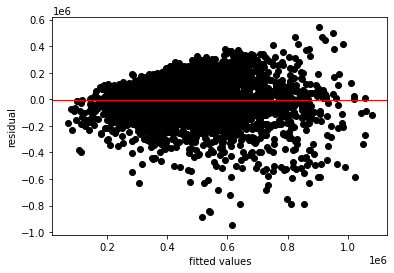

In [145]:
#residual plot
#
import matplotlib.pyplot as plt
#
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**observation**: This residual plot shows that there is no overfitting and underfitting of data And having more residuals close to 0 indicating model is fairly correct in predicting. also there is no glaringly obvious patterns hence no heteroskedasticity. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [146]:
#Checking for heteroskedascicity of model using bartlett's test.
# 
import scipy as sp
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
#
#setting degree of freedom
degree_of_freedom = len(y_pred)-1
#
#getting probality
probability = 1 - p_value
#
#computing critical value using chi_squared distribution.
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
#
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



0.8484835114485726
the variances are homogeneous!


####model evaluation

In [147]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 122004.0800760368
Mean Squared Error: 25966494856.34831
Root Mean Squared Error: 161141.22643305254


**observation**: We can see that when using multiple linear regression the values of MSE reduced, it is lower than the baseline MSE.

We get the value of root mean squared error as 25966494856.34831, which is  greater than 10% of the mean value of the price of all houses. this means that our algorithm was not very accurate and cannot make good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are :
*  Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that. 
* The features we used may not have had a high enough correlation to the values we were trying to predict.
* Need more data: Only one year worth of data isn't that much, 
* having many years worth could have helped us improve the accuracy quite a bit.

### Quantile Regression

As we have seen, linear regression models make a key assumption about the random error term in the linear model. The assumption is that the error term has a constant variance across the values of independent variable X. However, when the assumption is no longer true, we use quantile regression

We will try to figure out whether the co-effecients change when we have low, medium and high prices of houses.

In [148]:
#data to be used
#
house2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [149]:
# Quantile regression features, we include the features we got in multivariate analysis.
#
#import package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
#
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
bedrooms= house2['bedrooms']
sqft_lot	= house2['sqft_lot']

In [150]:
#mod = Q_reg.QuantReg(Y_train, X_train)
#
mod = smf.quantreg('price~ bathrooms + bedrooms + sqft_living15 + sqft_living + grade + sqft_lot + sqft_basement', house2)
#
res1 = mod.fit(q=.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [151]:
# Then print out the summary of our model
#
print(res1.summary())

# You see that our intercept is 6.0189 and our slope or the coefficient for our x is 0.1092. 
# These are the parameters for the 0.5th quantile of our price

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2824
Model:                       QuantReg   Bandwidth:                   2.682e+04
Method:                 Least Squares   Sparsity:                    3.630e+05
Date:                Sat, 21 Nov 2020   No. Observations:                18698
Time:                        18:44:45   Df Residuals:                    18690
                                        Df Model:                            7
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.649e+05   1.28e+04    -28.540      0.000    -3.9e+05    -3.4e+05
bathrooms     -3.261e+04   2882.580    -11.314      0.000   -3.83e+04    -2.7e+04
bedrooms      -1.958e+04   2029.193     -9.648      0.000   -2.36e+04   -1.56e+04
sqft_living15    45.7856      3.639  

Observation: Pseudo R_squared is 0.2824, this is not useful since it is less than 0.05.

In [158]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.25,0.75,0.99) 

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
print(res.summary())

print(res.summary())
print("*****************************************************************")
print(res.params)



                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2266
Model:                       QuantReg   Bandwidth:                   2.406e+04
Method:                 Least Squares   Sparsity:                    3.811e+05
Date:                Sat, 21 Nov 2020   No. Observations:                18698
Time:                        18:55:19   Df Residuals:                    18690
                                        Df Model:                            7
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.276e+05   1.06e+04    -30.911      0.000   -3.48e+05   -3.07e+05
bathrooms     -1.613e+04   2509.681     -6.428      0.000   -2.11e+04   -1.12e+04
bedrooms      -2.223e+04   1750.959    -12.694      0.000   -2.57e+04   -1.88e+04
sqft_living15    41.0597      3.062  

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


**observation**:  pseudo R-squared of 0.06 is not useful, it should be below 0.05

this checks whether independent variable has effect on depedent variable. thus indepedent variable has no effect on depedent variables

In [163]:
from sklearn import preprocessing
#deviding data to feature and target variable
x = house2.drop(columns = ['price'])
y =house2['price']
#
#Standardize the variables
# sometimes It is not necessary to standardize the target because it is on it own axis 
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [167]:
#splitting dataset to train and test variable
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
# model evaluation for testing set
y_test_predict = lin_reg.predict(x_test)
r2 = metrics.r2_score(y_test, y_test_predict).round(2)
print('R Squared score is {}'.format(r2) )
print("The mean squared error for the linear model:",metrics.mean_squared_error(y_test, y_test_predict))


R Squared score is 0.67
The mean squared error for the linear model: 17881028495.547092


**observation**: R Squared score is 0.67 is of no significant

###Lasso Regression

In [200]:
#dataset to be used
#
house2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [201]:
# Creating features and target matrixes
#
x = house2.drop(['price'], axis=1)
y = house2['price']

In [202]:
## we first scale(standandize the data)
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
#
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [203]:
#build Lasso model
#we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
#
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [192]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 
#
# Fitting the models
# 
lasso.fit(x, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6966351396600.625, tolerance: 100150243513.87804
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [204]:

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6792575165532181
lasso MSE: 17179611628.21756
lasso coef: [-12199.63777026  19087.07759321 133206.76726601   3135.45532368
  16384.8051115       0.          15506.55546187  18766.38443245
  87619.80567397 -57069.42161037 -34322.57472679 -63199.32913955
      0.         -17567.50212272  79573.31277693 -12348.5230057
  26165.4713628  -12143.14018847]


From the out come the outcome we can see

lasso MSE: 17179611628.21756

Baseline MSE: MSE: 26611887324.88157 the lasso regression has reduced MSE

In [205]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(5, 10, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [206]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.684469434248682
linear score: 0.6844693335718296
lasso MSE: 16948311867.94849
linear MSE: 16948317275.674011
lasso best estimator coef: [-11353.03034631  20207.36599959 131207.1794808    2555.45119282
  15864.75715284      0.          15249.74333395  19027.19525488
  88116.16824764 -59266.45274137 -34661.58203635 -63677.49232189
      0.         -17061.51825461  79726.878598   -12320.77287267
  28756.63198145 -12033.54154661]
linear coef: [-1.13531292e+04  2.02079629e+04  3.72658515e+04  2.55589618e+03
  1.58647794e+04  3.63797881e-11  1.52498009e+04  1.90272980e+04
  8.81159756e+04  3.08422604e+04  1.46376066e+04 -6.36777264e+04
 -7.27595761e-12 -1.70617773e+04  7.97270158e+04 -1.23210292e+04
  2.87571805e+04 -1.20339766e+04]


**observation**: some variables are reduced to zero but not removed. lasso score is 68.44%

In [207]:
# Importing library for visualization
#
#import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_) 

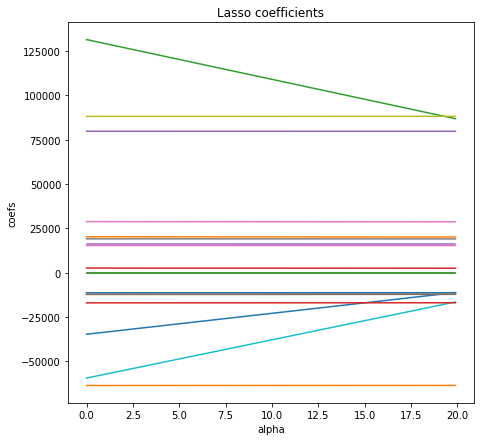

In [208]:
# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**observation**: Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
Therefore Lasso can also be used to determine which features are important 
to us and keeps the features that may influence the target variable

### Ridge regression.

In [211]:
# data for using in Ridge regression
#
house2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [215]:
from sklearn.linear_model import Ridge
#
# Spliting target variable and independent variables
x = house2.drop(['price'], axis = 1)
y = house2['price']
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
6             3       2.25         1715  ... -122.327           2238        6819
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[18698 rows x 18 columns]
0

In [216]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

17179611589.117676


The output  value of 17179611589.117676 will be our indicator to determine if the regularized ridge regression model is superior or not.

In [217]:
# Determining the value of a L2 hyperparameter requires the use of a grid.
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test
#
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [218]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

17370846902.325905

In [219]:
# our alpha
search.best_params_

{'alpha': 0.01}

* The best_params_ tells us what to set alpha too which in this case is 0.01. 
* The best_score_ tells us what the best possible mean squared error is. in this case, the value of 17370846902.325905 is worse than what the baseline model was

In [220]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
#
print(second_model)

17182758624.14186


In [221]:

# This is confirmed with the coefficients of each model found below.
# 
# The 17182758624.14186 is lower than the 17370846902.325905 This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house2.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
#
# The coefficient values are about the same. This means that the penalization made little difference with this dataset

{'bathrooms': 63.914209244169044,
 'bedrooms': 27765.186880800287,
 'condition': 85477.33517178256,
 'floors': 7.74059571995167e-09,
 'grade': 35.960082693686196,
 'lat': -96034.06053402387,
 'long': 43.71247388146036,
 'price': -14385.25746824004,
 'sqft_above': 27.954126596487207,
 'sqft_basement': -2181.7294684648323,
 'sqft_living': 0.27615050729518414,
 'sqft_living15': -1.3601692053744046,
 'sqft_lot': 30334.458413766355,
 'view': 28967.008351076915,
 'waterfront': 38758.08664179278,
 'yr_built': -1.7462298274040222e-10,
 'yr_renovated': -329.5974600419419,
 'zipcode': 567527.1542835712}

**observation**: ridge regression uses L2 regulazisation and shrink the coefficients but does not make them zero.

###Elastic Net Regression

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [223]:
#dataset to use
#
house2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [224]:
#splitting the dataset
#
x = house2.drop(['price'], axis = 1)
y = house2['price']
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
6             3       2.25         1715  ... -122.327           2238        6819
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[18698 rows x 18 columns]
0

In [225]:
# Creating our linear regression model for the purpose of comparison(setting baseline)
# 
regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model) 

# This mean standard error score of 17179611589.117676 is our benchmark for determining 
# if the elastic net model will be better or worst. 
#
#baseline MSE 17179611589.117676

17179611589.117676


In [226]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 27765.186880800287,
 'bedrooms': -14385.25746824004,
 'condition': 28967.008351076915,
 'floors': 30334.458413766355,
 'grade': 85477.33517178256,
 'lat': 567527.1542835712,
 'long': -96034.06053402387,
 'sqft_above': 35.960082693686196,
 'sqft_basement': 27.954126596487207,
 'sqft_living': 63.914209244169044,
 'sqft_living15': 43.71247388146036,
 'sqft_lot': 0.27615050729518414,
 'sqft_lot15': -1.3601692053744046,
 'view': 38758.08664179278,
 'waterfront': 7.74059571995167e-09,
 'yr_built': -2181.7294684648323,
 'yr_renovated': -1.7462298274040222e-10,
 'zipcode': -329.5974600419419}

In [227]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.1,.2,.3,.9]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [230]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
##getting MSE
search.fit(x,y)
search.best_params_
abs(search.best_score_)

17372993337.003517

In [229]:
#getting aplha and L1 ratio
#
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.9}

In [233]:
# The best hyperparameters was an alpha set to 0.0001 and a l1_ratio of 0.9. 
# With these settings we got an MSE of 17372993337.003517. This is above our baseline model of MSE 17179611589.117676  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
#finding best alpha nd L1_ratio
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.9)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

17774481466.602196


In [235]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 

{'bathrooms': 23297.635663230594,
 'bedrooms': -6236.910262506693,
 'condition': 28646.370049367884,
 'floors': 26152.377298278712,
 'grade': 65157.17941978008,
 'lat': 497844.23311070586,
 'long': -89726.95779396483,
 'sqft_above': 44.12034031523391,
 'sqft_basement': 37.89184370578613,
 'sqft_living': 51.02998674910386,
 'sqft_living15': 51.68352011294037,
 'sqft_lot': 0.07720437045379304,
 'sqft_lot15': -0.7823027332785569,
 'view': 37672.031156631805,
 'waterfront': 0.0,
 'yr_built': -1463.1022210023962,
 'yr_renovated': 0.0,
 'zipcode': -155.97115733607555}

**observation**: waterfront and yr-of renovation was completely removed from the model in the elastic net version. 

This means that this values was not good to the algorithm. Traditional regression cannot do this

## model interpretation

Model R-squared score

From the data above we can see that the best model for the prediction of this dataset are lasso regression at 51.55% and linear regression with 51%.

## Follow up questions

1. Did we have the right data?

yes. thought there was no accurate score, this can be solved using optimization.

2. Do we need other data to answer our question?

Probably more data needs to be sought so as to improve the model and provide meaningful predictions.

3. Did we have the right question?

yes.